![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcREYV9sXfo_8FdHZ4MVHjN_LmXIUNKCvk6BbA&usqp=CAU)


so, in this notebook i will try to do all end to end ml .. i mean from EDA(Exploratory Data Analysis) to Deploying the Final Trained Model 
Notebook ini menckup proses end to end dari EDA sampai dengan deployment model Final

* Data Collection and Problem Statement
* Exploratory Data Analysis 
* Data Preparation(feature engineering)
* Selecting and Training a few Machine Learning Models
* Cross-Validation and Hyperparameter Tuning
* Deploying the Final Trained Model  

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\ppl2\anaconda3\lib\site-packages\scikit_learn-1.5.2-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\ppl2\anaconda3\lib\site-packages\threadpoolctl-3.5.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

!pip install yellowbrick

from yellowbrick.target import FeatureCorrelation
from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
color = sns.color_palette()
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

DEPRECATION: Loading egg at c:\users\ppl2\anaconda3\lib\site-packages\scikit_learn-1.5.2-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\ppl2\anaconda3\lib\site-packages\threadpoolctl-3.5.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
import os
os.getcwd()

'C:\\Users\\PPL2\\Documents\\Private\\Model\\Pacmann Data Science\\Project\\Project X'

# 1. Data Collection

In [4]:
data = pd.read_csv(r'C:\\Users\\PPL2\\Documents\\Private\\Model\\Pacmann Data Science\\Project\\Project X/data.csv')
#data_gen = pd.read_csv('../input/spotify-dataset-19212020-160k-tracks/data_by_genres.csv')
#data_w_gen = pd.read_csv('../input/spotify-dataset-19212020-160k-tracks/data_w_genres.csv')
#data_yr = pd.read_csv('../input/spotify-dataset-19212020-160k-tracks/data_by_year.csv')
data_ar = pd.read_csv(r'C:\\Users\\PPL2\\Documents\\Private\\Model\\Pacmann Data Science\\Project\\Project X/artists.csv')
data_top50 = pd.read_csv(r'C:\\Users\\PPL2\\Documents\\Private\\Model\\Pacmann Data Science\\Project\\Project X/top50.csv',encoding='ISO-8859-1')
data.head()

id                       name   artists  duration_ms  \
0  0gNNToCW3qjabgTyBSjt3H  !Que Vida! - Mono Version  ['Love']       220560   
1  0tMgFpOrXZR6irEOLNWwJL                       "40"    ['U2']       157840   
2  2ZywW3VyVx6rrlrX75n3JB                "40" - Live    ['U2']       226200   
3  6DdWA7D1o5TU2kXWyCLcch     "40" - Remastered 2008    ['U2']       157667   
4  3vMmwsAiLDCfyc1jl76lQE     "40" - Remastered 2008    ['U2']       157667   

  release_date  year  acousticness  danceability  energy  instrumentalness  \
0      11/1/66  1966        0.5250         0.600   0.540           0.00305   
1      2/28/83  1983        0.2280         0.368   0.480           0.70700   
2      8/20/83  1983        0.0998         0.272   0.684           0.01450   
3      2/28/83  1983        0.1850         0.371   0.545           0.58200   
4      2/28/83  1983        0.1850         0.371   0.545           0.58200   

   liveness  loudness  speechiness    tempo  valence  mode  key  popularity  \
0     0.100   -11.803       0.0328  125.898    0.547     1    9          26   
1     0.159   -11.605       0.0306  150.166    0.338     1    8          21   
2     0.946    -9.728       0.0505  143.079    0.279     1    8          41   
3     0.183    -9.315       0.0307  150.316    0.310     1    8          37   
4     0.183    -9.315       0.0307  150.316    0.310     1    8          35   

   explicit  
0         0  
1         0  
2         0  
3         0  
4         0

# 2. Data Definition
# definisikan tipe data, range data serta penjelasan untuk tiap observasi (variabel)

In [5]:
data.describe()

duration_ms           year   acousticness   danceability  \
count  1.699070e+05  169907.000000  169907.000000  169907.000000   
mean   2.314071e+05    1977.223234       0.493217       0.538147   
std    1.213223e+05      25.593318       0.376628       0.175345   
min    5.108000e+03    1921.000000       0.000000       0.000000   
25%    1.710400e+05    1957.000000       0.094500       0.417000   
50%    2.086000e+05    1978.000000       0.492000       0.548000   
75%    2.629665e+05    1999.000000       0.888000       0.667000   
max    5.403500e+06    2020.000000       0.996000       0.988000   

              energy  instrumentalness       liveness       loudness  \
count  169907.000000     169907.000000  169907.000000  169907.000000   
mean        0.488591          0.161939       0.206692     -11.370311   
std         0.267391          0.309330       0.176797       5.666795   
min         0.000000          0.000000       0.000000     -60.000000   
25%         0.263000          0.000000       0.098400     -14.470000   
50%         0.481000          0.000204       0.135000     -10.474000   
75%         0.710000          0.086800       0.263000      -7.118000   
max         1.000000          1.000000       1.000000       3.855000   

         speechiness          tempo        valence           mode  \
count  169907.000000  169907.000000  169907.000000  169907.000000   
mean        0.094058     116.947850       0.532091       0.708552   
std         0.149938      30.727079       0.262407       0.454431   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.034900      93.516000       0.322000       0.000000   
50%         0.045000     114.777000       0.544000       1.000000   
75%         0.075400     135.712000       0.749000       1.000000   
max         0.969000     244.091000       1.000000       1.000000   

                 key     popularity       explicit  
count  169907.000000  169907.000000  169907.000000  
mean        5.200498      31.556681       0.084864  
std         3.515272      21.582730       0.278680  
min         0.000000       0.000000       0.000000  
25%         2.000000      12.000000       0.000000  
50%         5.000000      33.000000       0.000000  
75%         8.000000      48.000000       0.000000  
max        11.000000     100.000000       1.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169907 entries, 0 to 169906
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169907 non-null  object 
 1   name              169907 non-null  object 
 2   artists           169907 non-null  object 
 3   duration_ms       169907 non-null  int64  
 4   release_date      169907 non-null  object 
 5   year              169907 non-null  int64  
 6   acousticness      169907 non-null  float64
 7   danceability      169907 non-null  float64
 8   energy            169907 non-null  float64
 9   instrumentalness  169907 non-null  float64
 10  liveness          169907 non-null  float64
 11  loudness          169907 non-null  float64
 12  speechiness       169907 non-null  float64
 13  tempo             169907 non-null  float64
 14  valence           169907 non-null  float64
 15  mode              169907 non-null  int64  
 16  key               16

# 3. Exploratory Data Analaysis (EDA)

### Pertama-tama kita mengecek hal terkait dengan    ...  "popularity" .... dan sebelumnya kita mengecek fitur korelasi

untuk itu kita menggunakan  [yellowbrick](https://www.scikit-yb.org/en/latest/index.html) ... 

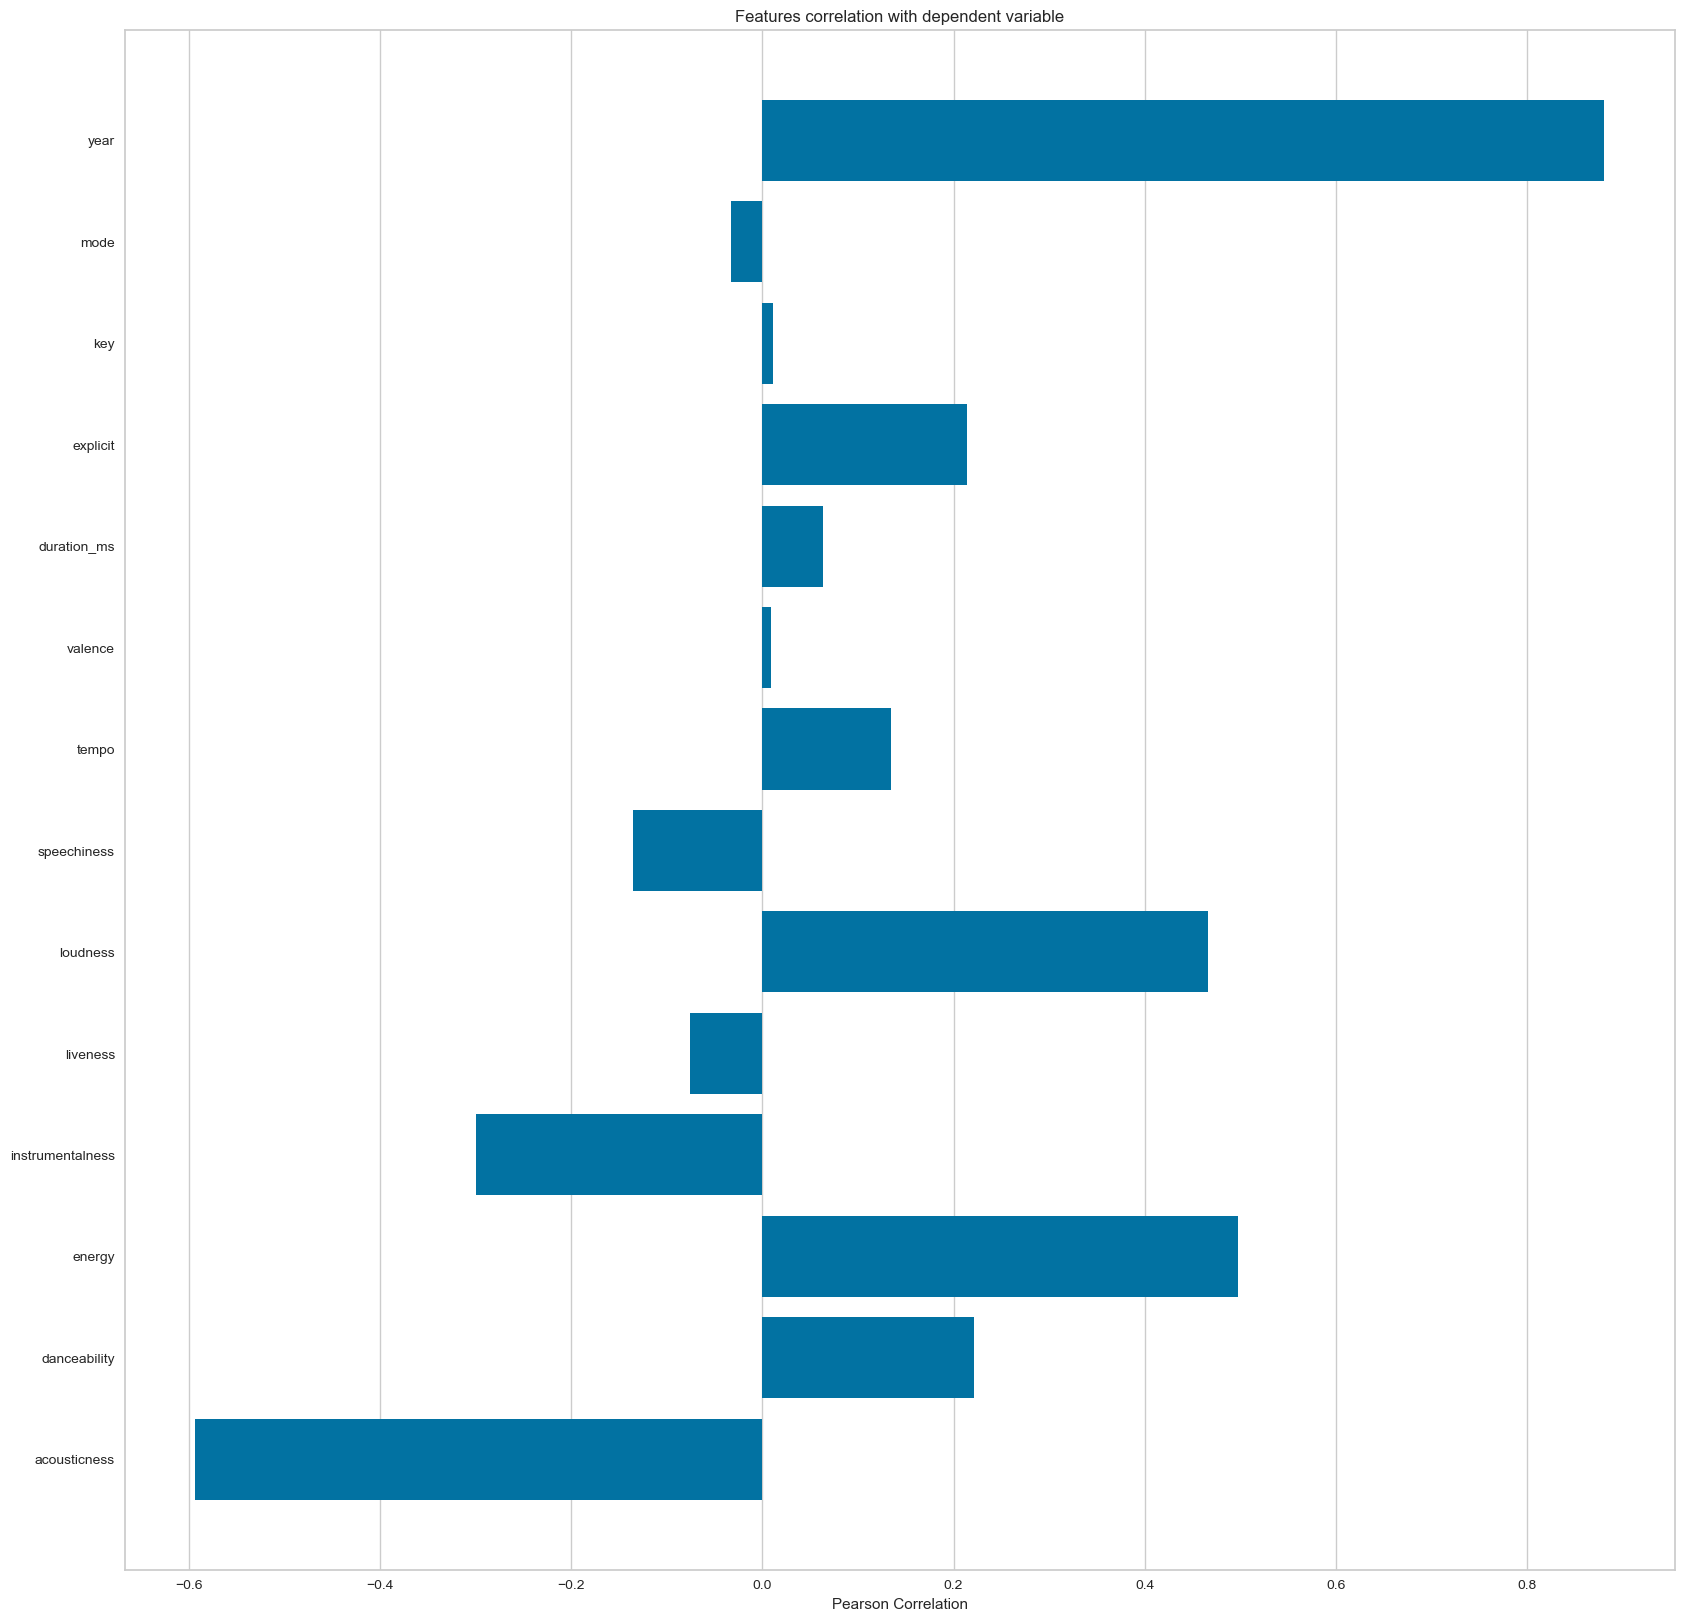

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [7]:

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()       

great .. totally we hvae 9 features with +ve correlation and 5 -ve .... 

In [8]:
total = data.shape[0]
popularity_score_more_than_40 = data[data['popularity'] > 40].shape[0]

probability = (popularity_score_more_than_40/total)*100
print("Probability of song getting more than 40 in popularity :", probability)

Probability of song getting more than 40 in popularity : 38.18853843573249


so popularity ranges from 0 to 100 ... so  Probability of song getting more than 40 is just 38.1 , well getting a song popular is bit difficult task right !!

**before moving to the complete features analysis lets just check for features with more than 0.4 correlation**

displot for the feartures .

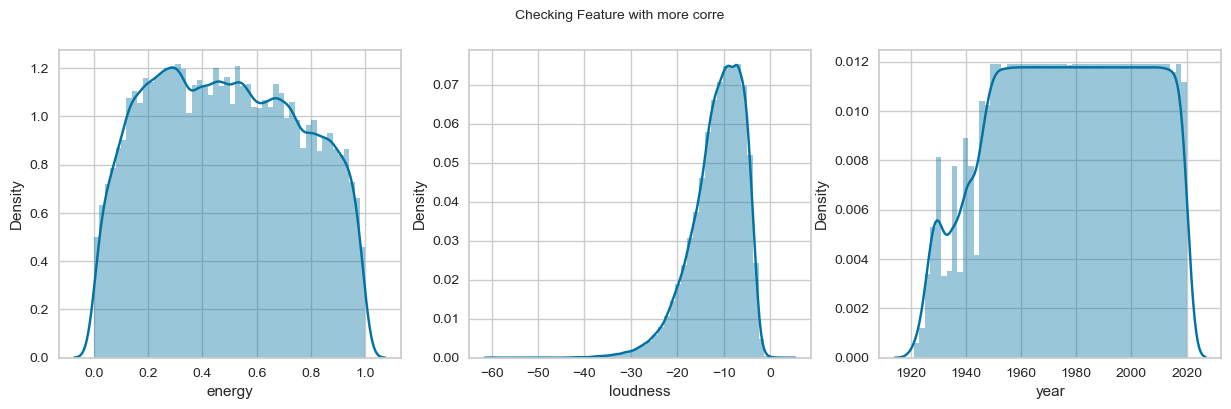

In [9]:
features_o = ['energy','loudness','year']

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
sns.distplot(data['energy'])

plt.subplot(1, 3, 2)
sns.distplot(data['loudness'])

plt.subplot(1, 3, 3)
sns.distplot(data['year'])

plt.suptitle('Checking Feature with more corre ', fontsize = 10)
plt.show()

Probplot for the feartures .

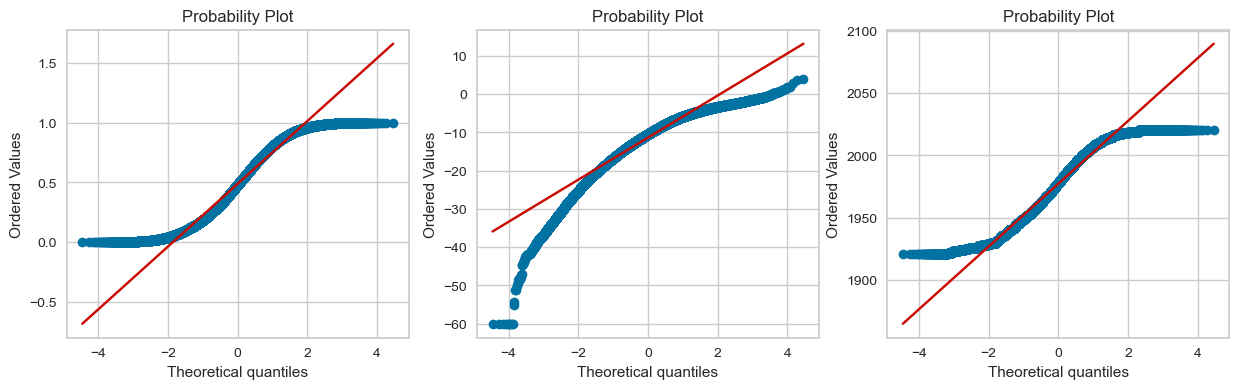

In [10]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
res = stats.probplot(data['energy'], plot=plt)

plt.subplot(1, 3, 2)
res = stats.probplot(data['loudness'], plot=plt)

plt.subplot(1, 3, 3)
res = stats.probplot(data['year'], plot=plt)

# Univariate analysis

Concern utama adalah untuk menentukan threshold yang mendefinisikan suatu observasi sebagai outlier. Untuk melakukan itu, kita perlu menstandardisasi data. Dalam konteks inis, standardisasi data berarti mengkonversi nilai data untuk memiliki mean 0 dan standard deviasi 1

# bivariate analysis 

### Loudness VS Pupolarity

> **"Loudness" of the song VS "popularity" by "years" with  Size "key" and for two binary attributes "explict" of the song and "mode" of the song**

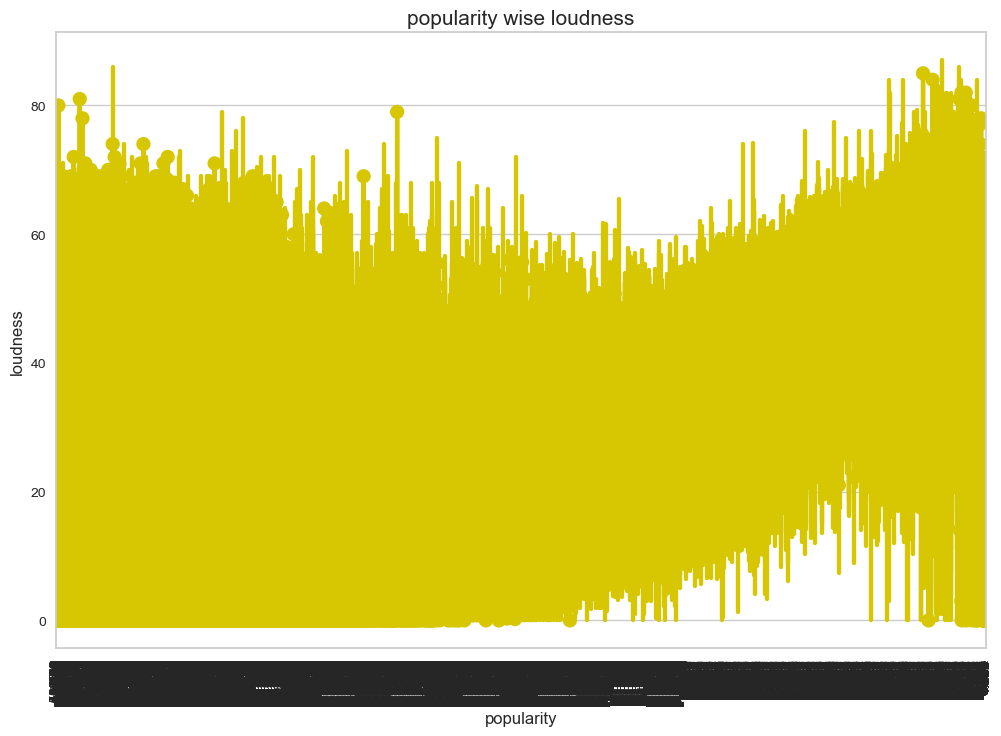

In [11]:
#x = data.groupby("loudness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()
data = pd.read_csv(r'C:\\Users\\PPL2\\Documents\\Private\\Model\\Pacmann Data Science\\Project\\Project X/data.csv')
x = data
#groupby("loudness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()
x.groupby("loudness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=x["loudness"].values, y=x['popularity'].values, color=color[4])

plt.ylabel('loudness', fontsize=12)
plt.xlabel('popularity', fontsize=12)
plt.title("popularity wise loudness", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

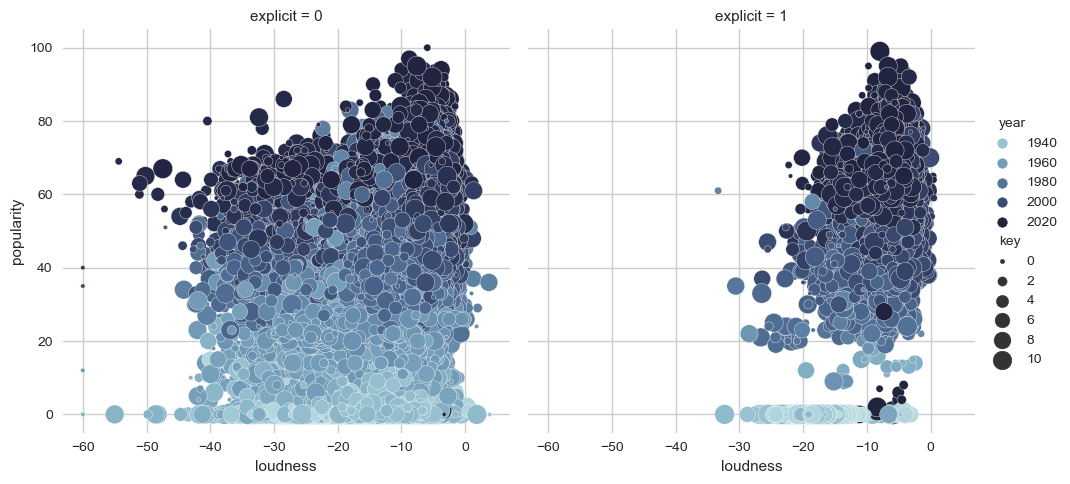

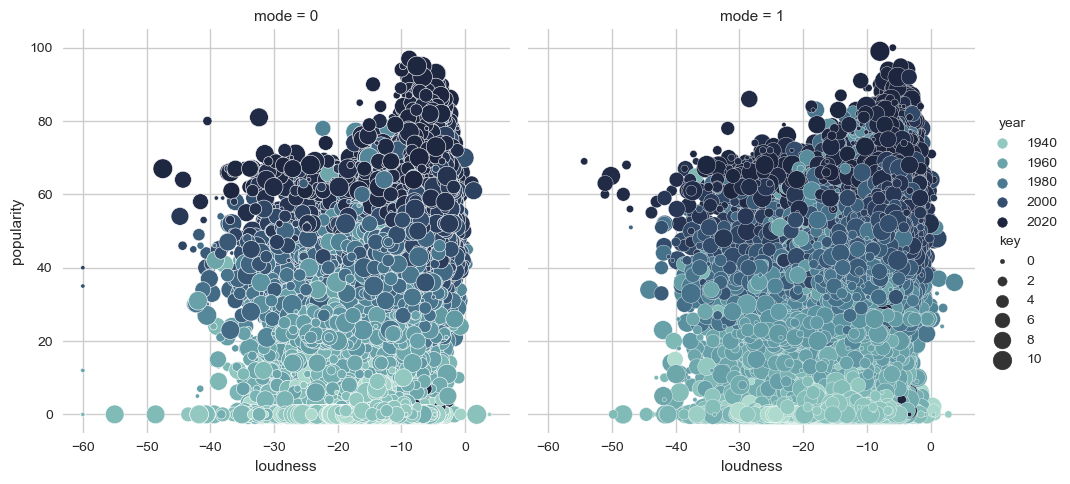

In [12]:

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="loudness", y="popularity",
    hue="year", size="key",col="explicit",
    palette=cmap, sizes=(10, 200)
)

g.despine(left=True, bottom=True)


cmap_ = sns.cubehelix_palette(rot=-.30, as_cmap=True)
g = sns.relplot(
    data=data,
    x="loudness", y="popularity",
    hue="year", size="key",col="mode",
    palette=cmap_, sizes=(10, 200),
)

g.despine(left=True, bottom=True)

lets check out the relation

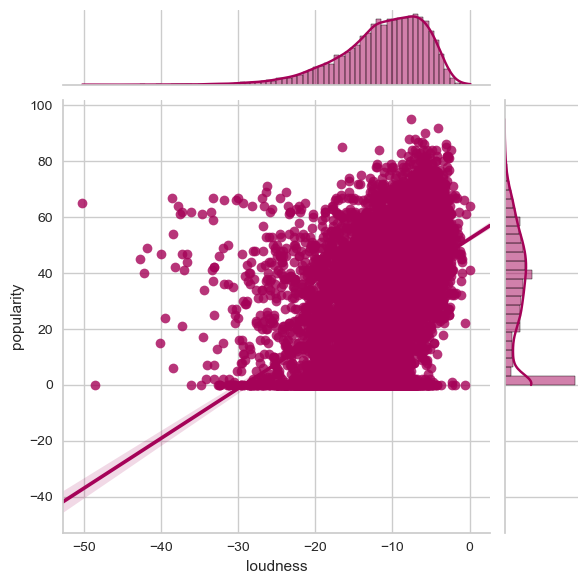

In [13]:
fig1 = sns.jointplot(x="loudness", y="popularity", data=data.sample(10000),
                  kind="reg", truncate=False,
                  color=color[3])

loudness memiliki relasi yang baik dengan popularitas, apakah semakin loud suatu lagu semakin popular?

karakteristik audio seperti "acousticness","danceability","energy","speechiness","liveness","valence" sepanjang tahun

jika diasumsikan "[]" sebagai null atau missing values, terdapat Top 4 genres 

* Movie tunnes 
* show tunnes
* classical piano 
* sleep 

berdasarkan genre, karakteristik audio akan berubah sesuai dengan key yang digunakan. Selanjutnya kita mengecek karakteristik audio seperti "acousticness", "danceability", "speechiness", "energy" and "valence" ..... semua value ini dalam range 0 ke 1

* sebagian besar genre "acousticness" memiliki efek lebih
* "movie tunes" and "show Tunnes" terlihat memiliki karakteristik audio "valence" rendah dan acousticness tinggi
* genre "classical piano" memilki "acousticness" dan tidak ada "speechiness" and "energy"

In [14]:
data['artists'].value_counts()

artists
['Эрнест Хемингуэй']                 1215
['Francisco Canaro']                  938
['Эрих Мария Ремарк']                 781
['Ignacio Corsini']                   620
['Frank Sinatra']                     592
                                     ... 
['Ancient Astronauts']                  1
['Mel McDaniel', 'Oklahoma Wind']       1
['Mouse and Level']                     1
['Branches']                            1
['Leessang', 'Jung In']                 1
Name: count, Length: 33375, dtype: int64

Top 5 artists  

* Эрнест Хемингуэй (Ernest Hemingway ) 
* Francisco Canaro 
* Эрих Мария Ремарк (Erich Maria Remarque) 
* Ignacio Corsini
* Frank Sinatra 

seperti kita ketahui bahwa artis didasarkan atas genre dan kreatifitas, selanjutnya kita akan menganalisa value dari karakterstik audio 

In [15]:
df_top1 = data[data['artists'] == "['Эрнест Хемингуэй']"]
df_top2 = data[data['artists'] == "['Francisco Canaro']"]
df_top3 = data[data['artists'] == "['Эрих Мария Ремарк']"]
df_top4 = data[data['artists'] == "['Ignacio Corsini']"]
df_top5 = data[data['artists'] == "['Frank Sinatra']"]

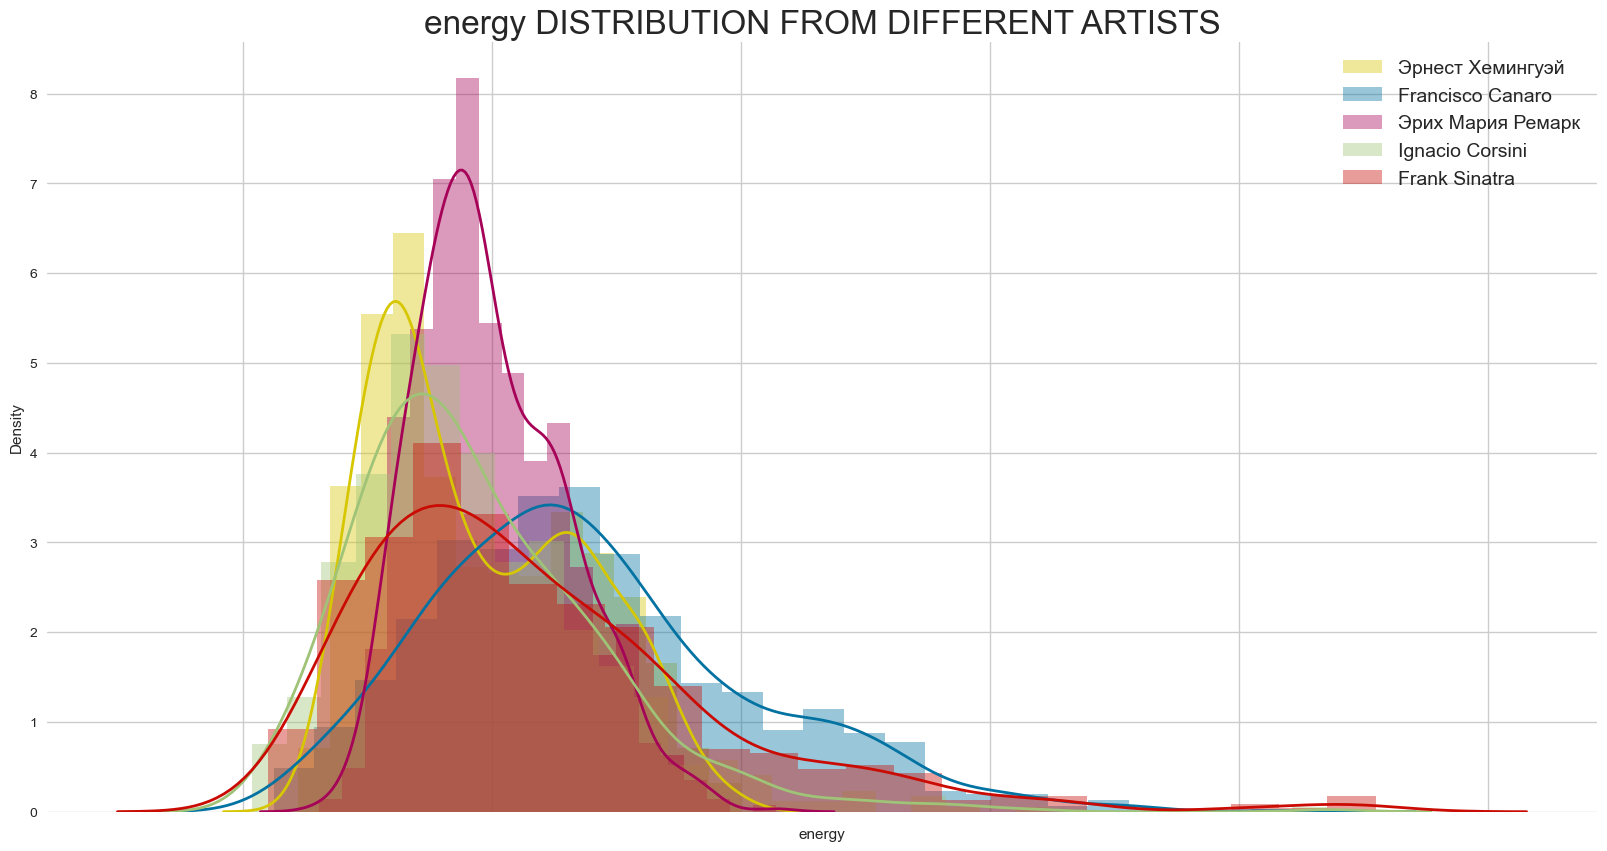

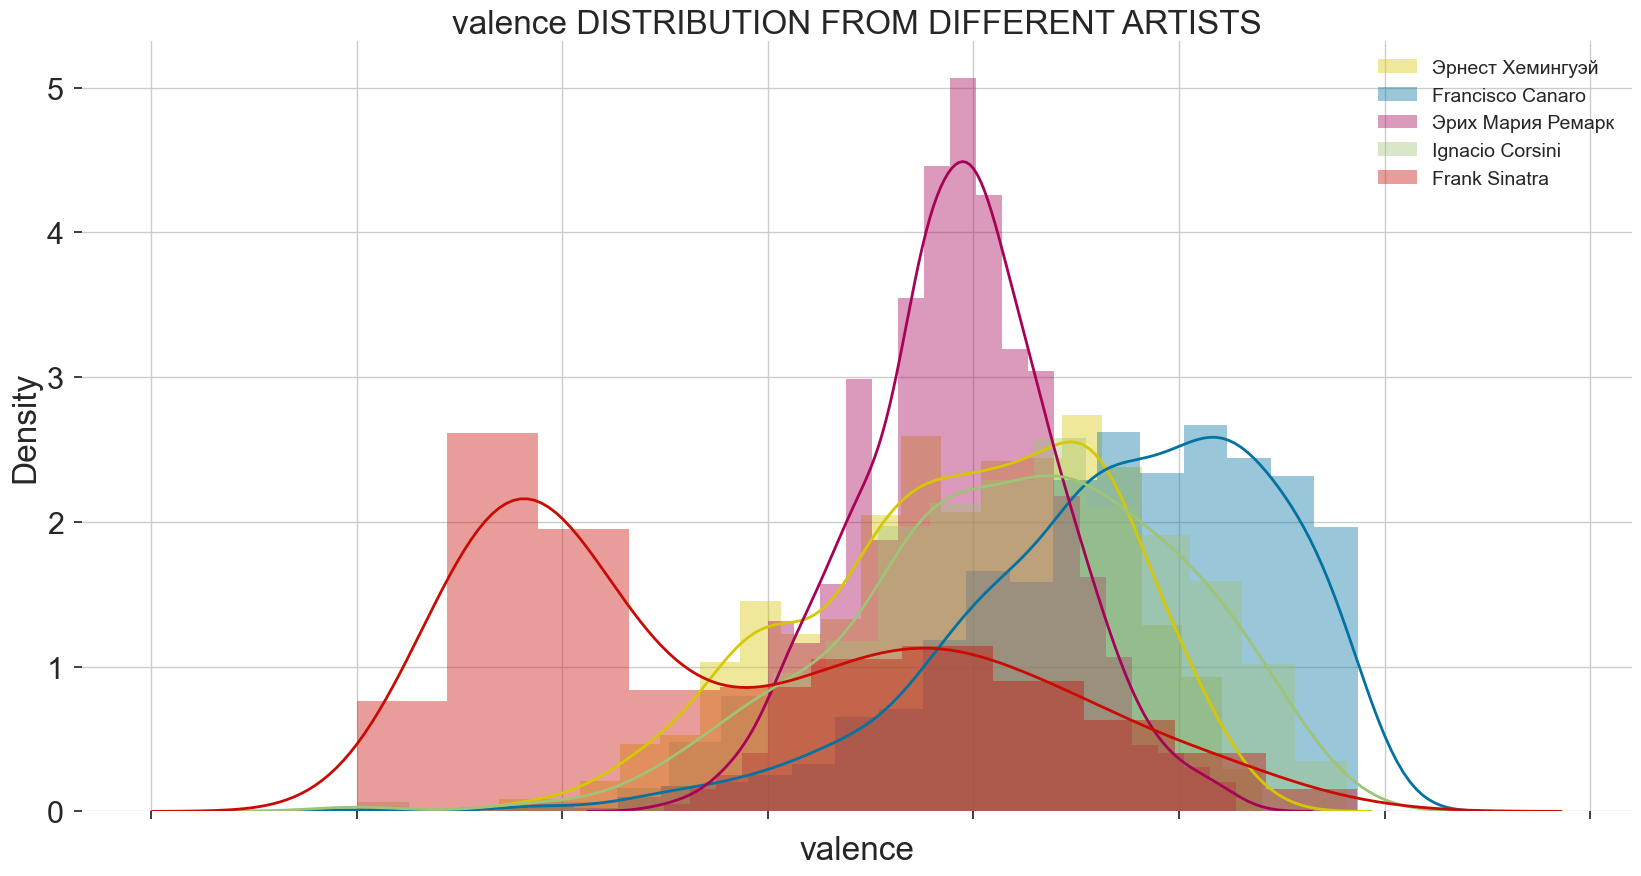

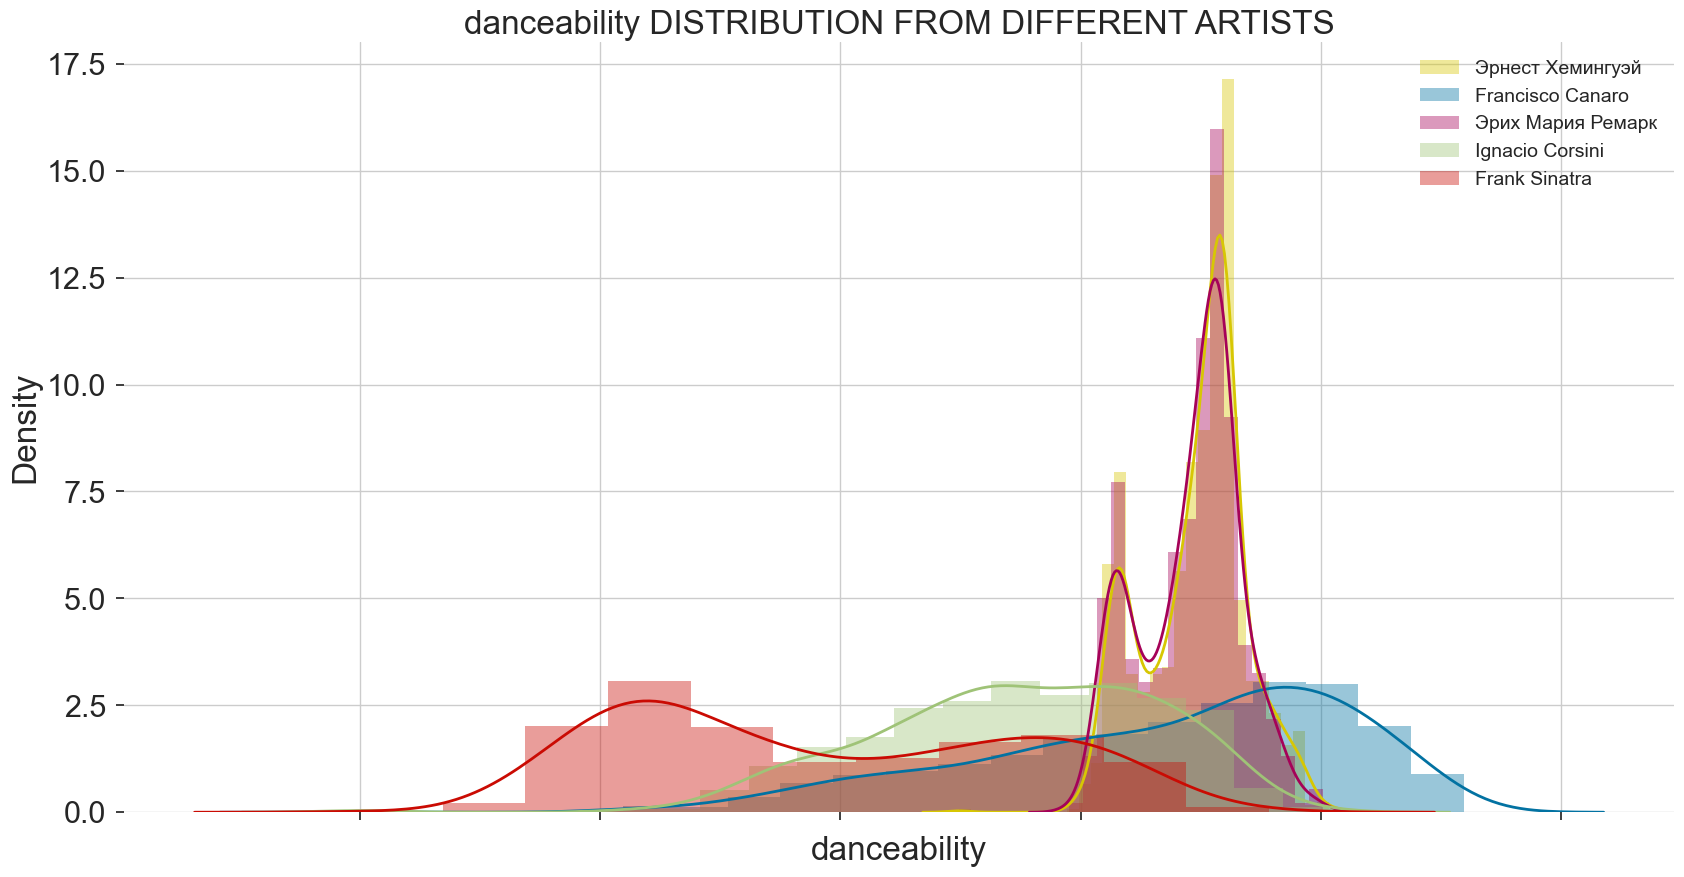

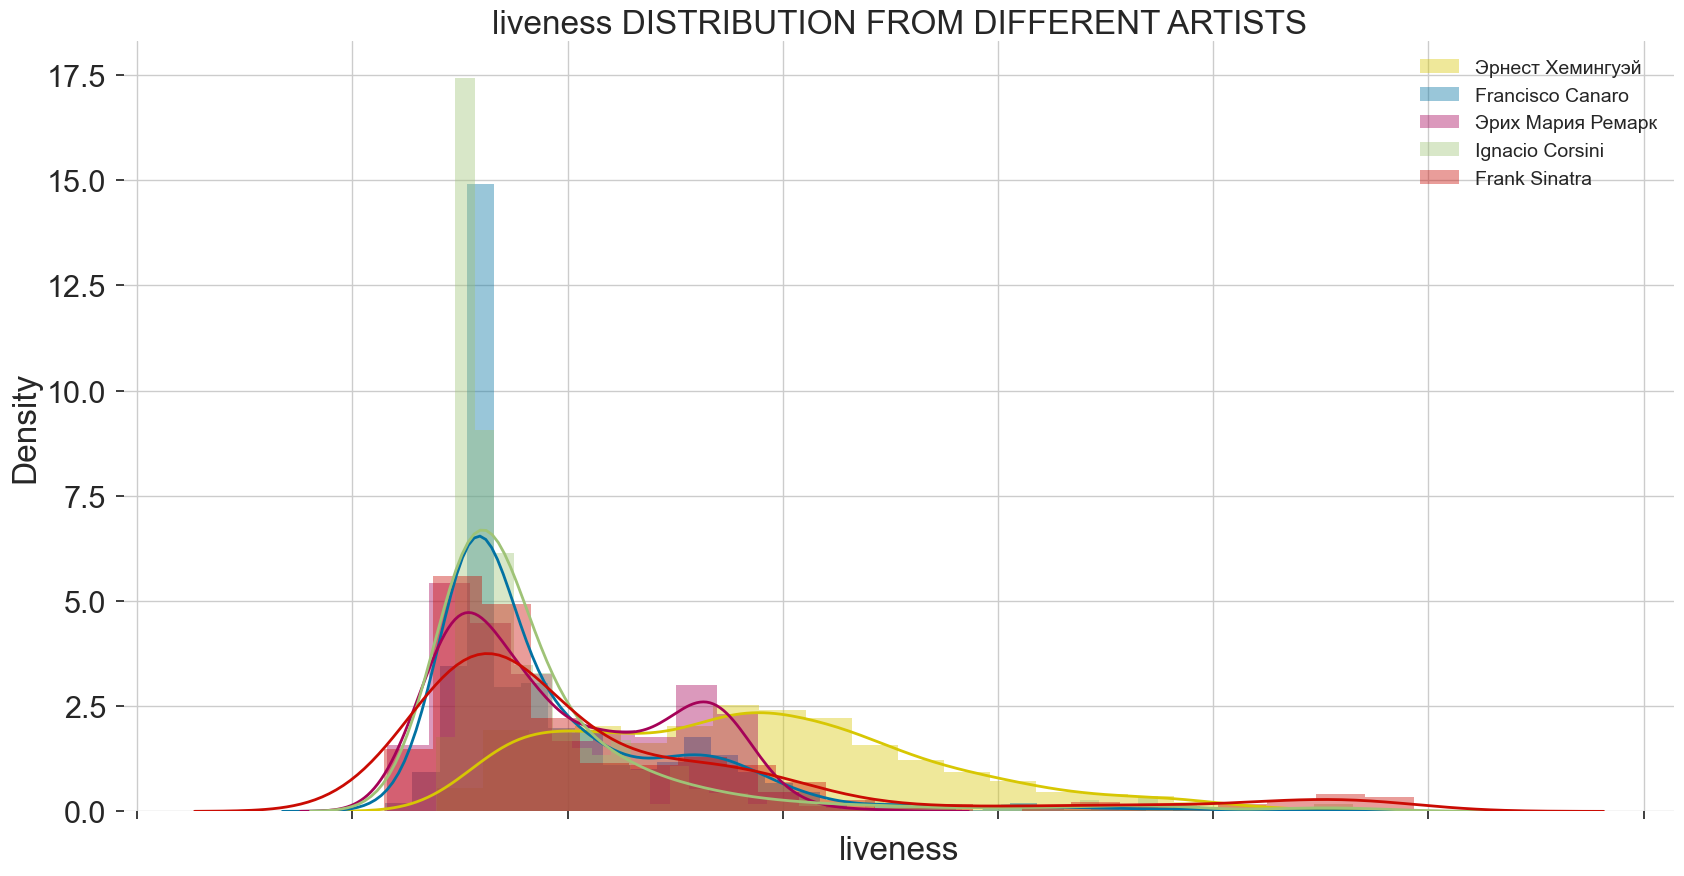

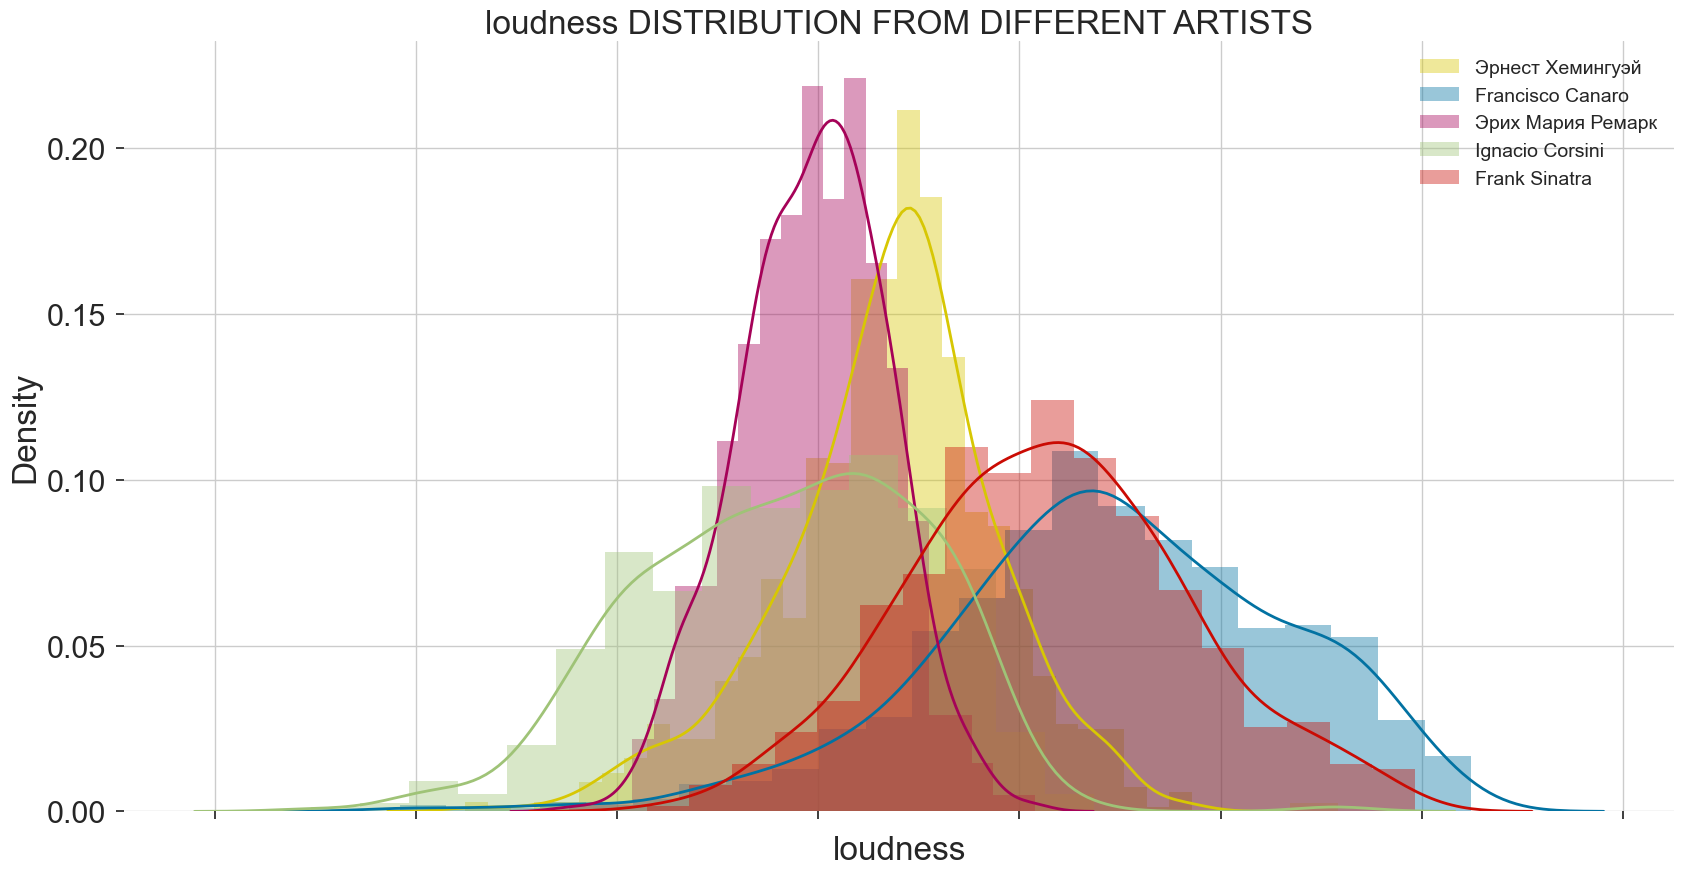

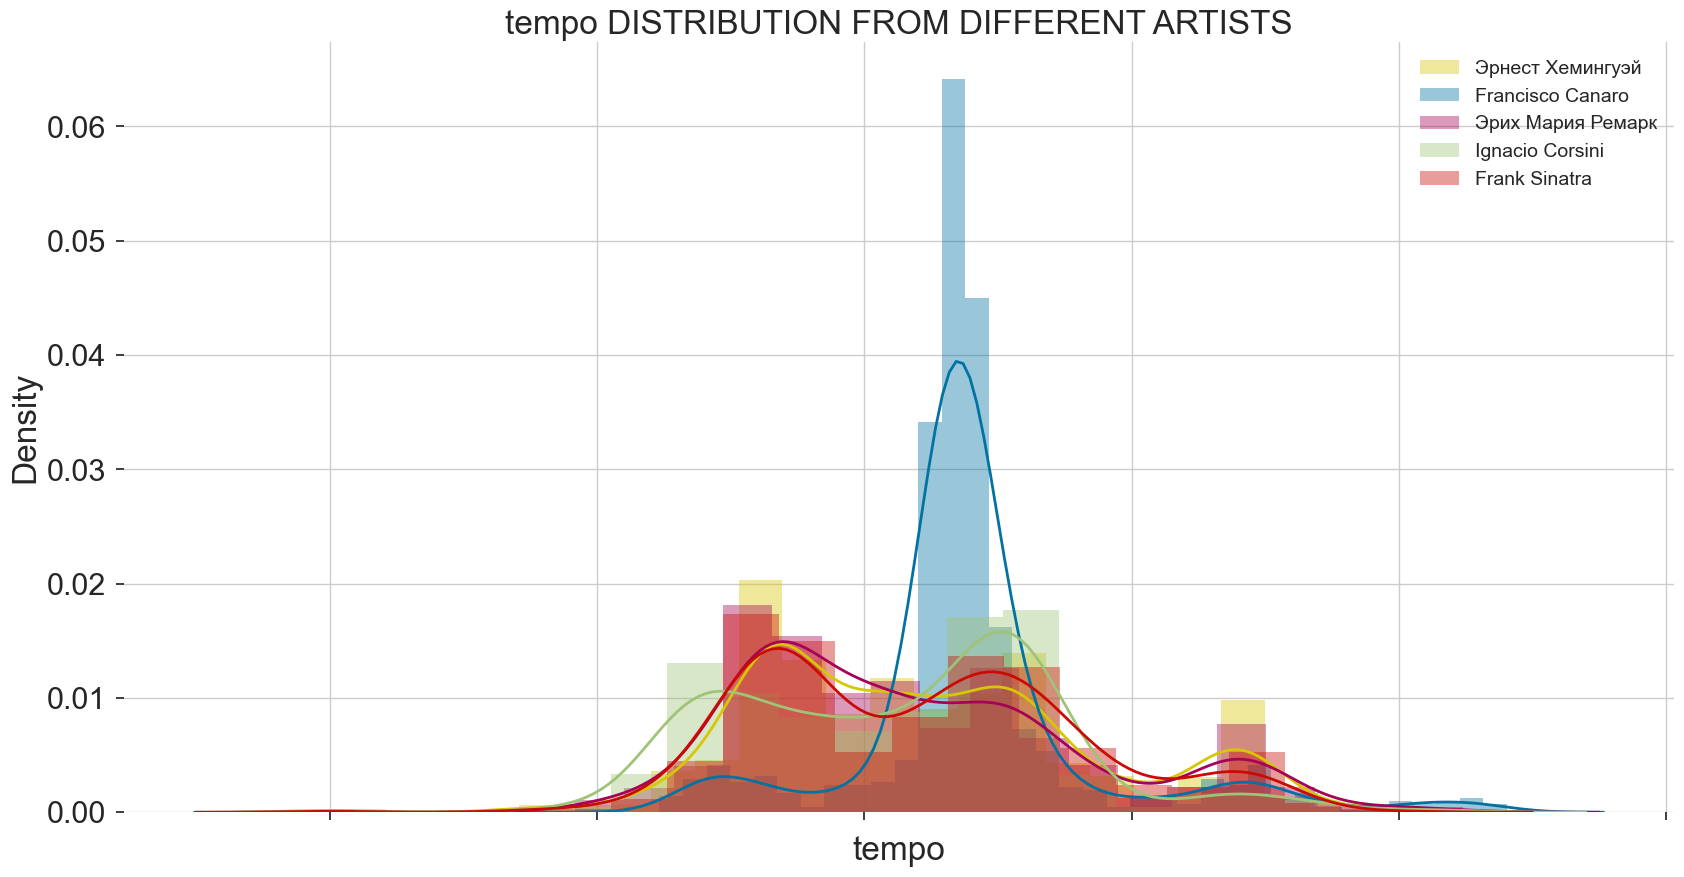

In [16]:

# for energy
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['energy'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['energy'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['energy'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['energy'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['energy'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('energy DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)

# for valence
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['valence'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['valence'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['valence'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['valence'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['valence'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('valence DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)

# danceability
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['danceability'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['danceability'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['danceability'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['danceability'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['danceability'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('danceability DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)

# for liveness
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['liveness'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['liveness'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['liveness'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['liveness'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['liveness'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('liveness DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)

# for loudness
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['loudness'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['loudness'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['loudness'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['loudness'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['loudness'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('loudness DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)

# fro tempo 
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['tempo'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['tempo'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['tempo'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['tempo'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['tempo'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('tempo DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)


selanjutnya kita menganalisa kunci dan mode dengan berbagai karakteristik audio

lets try seeing in form of Wordcloud for top50 Artist songs in 2019 

### Liveness VS Pupolarity

> **"liveness" of the song VS "popularity" by "years" with  Size "key" and for two binary attributes "explict" of the song and "mode" of the song**

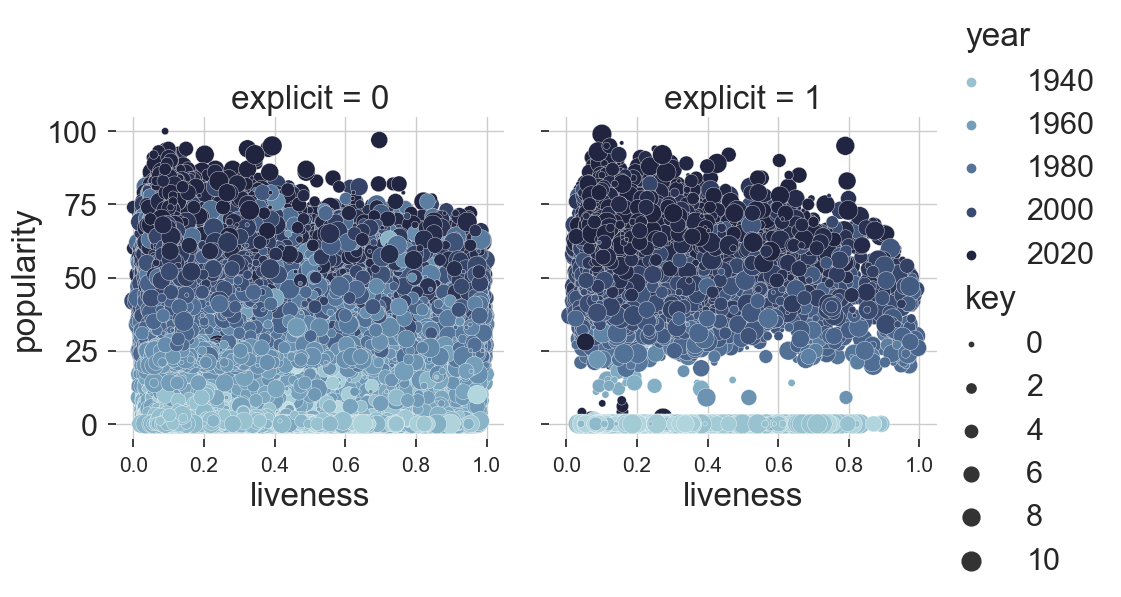

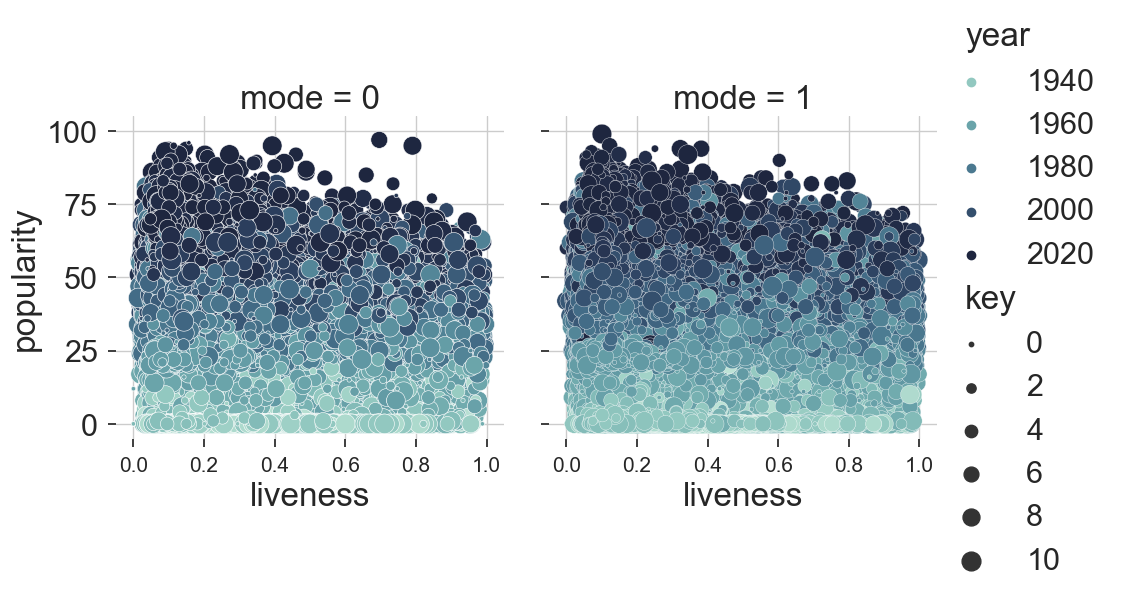

In [17]:

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="liveness", y="popularity",
    hue="year", size="key",col="explicit",
    palette=cmap, sizes=(10, 200),
)

g.despine(left=True, bottom=True)


cmap_ = sns.cubehelix_palette(rot=-.30, as_cmap=True)
g = sns.relplot(
    data=data,
    x="liveness", y="popularity",
    hue="year", size="key",col="mode",
    palette=cmap_, sizes=(10, 200),
)

g.despine(left=True, bottom=True)

biasanya sejalan dengan waktu dan teknologi terdapat perubahan
..
so lets check the change of Audio characteristics over year once 

Text(0.5, 0, 'Year')

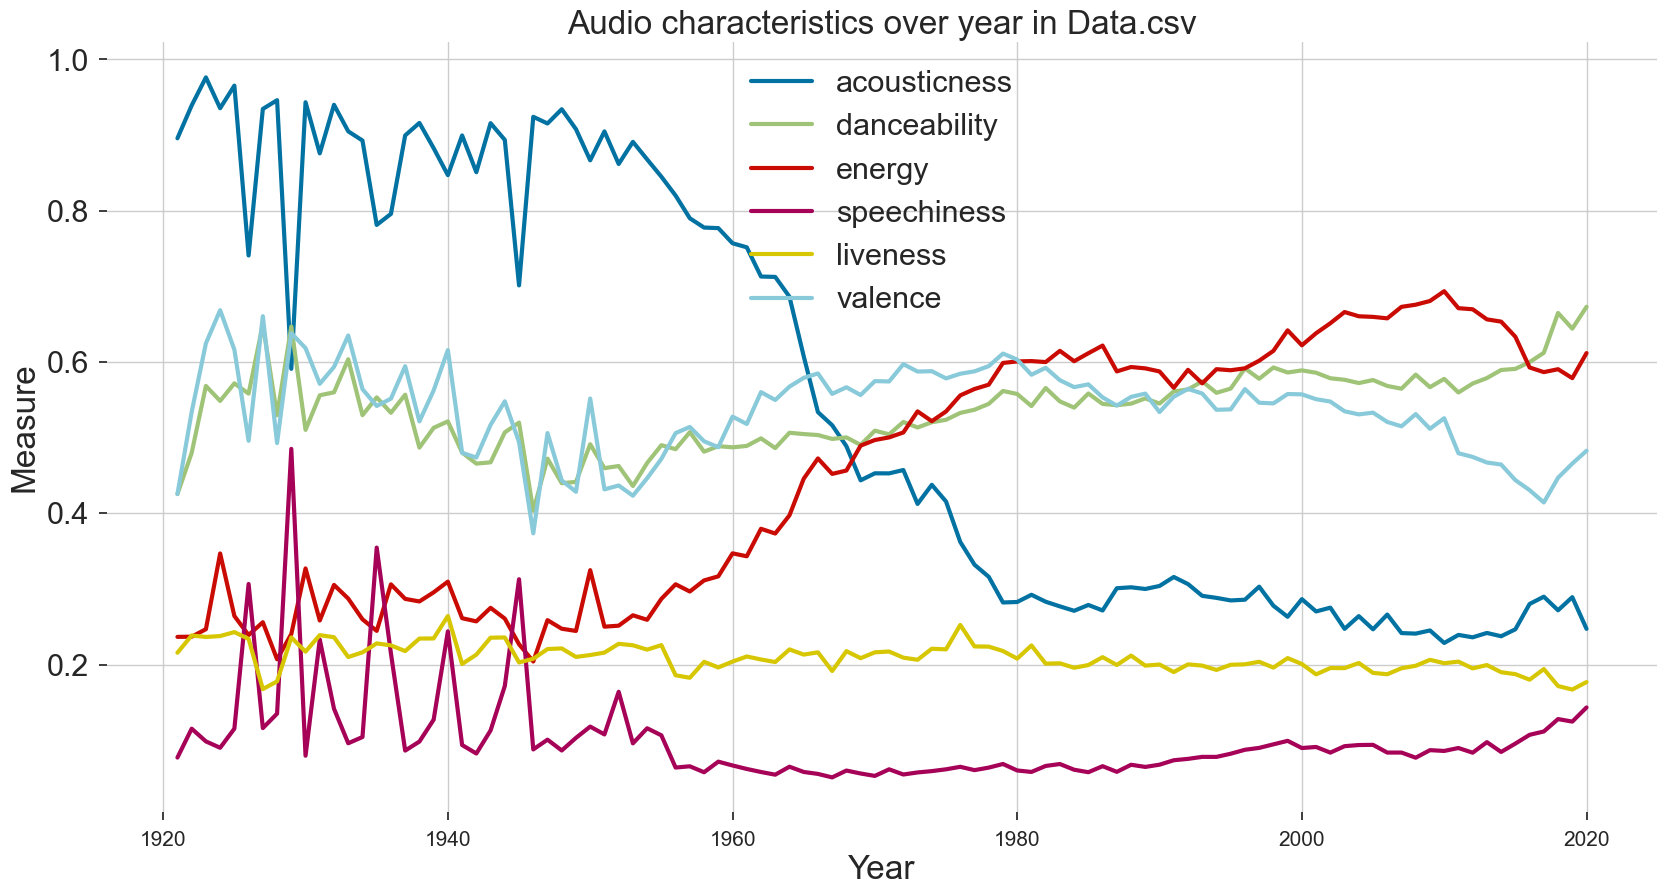

In [18]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year in Data.csv')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

hope you can see the difference 

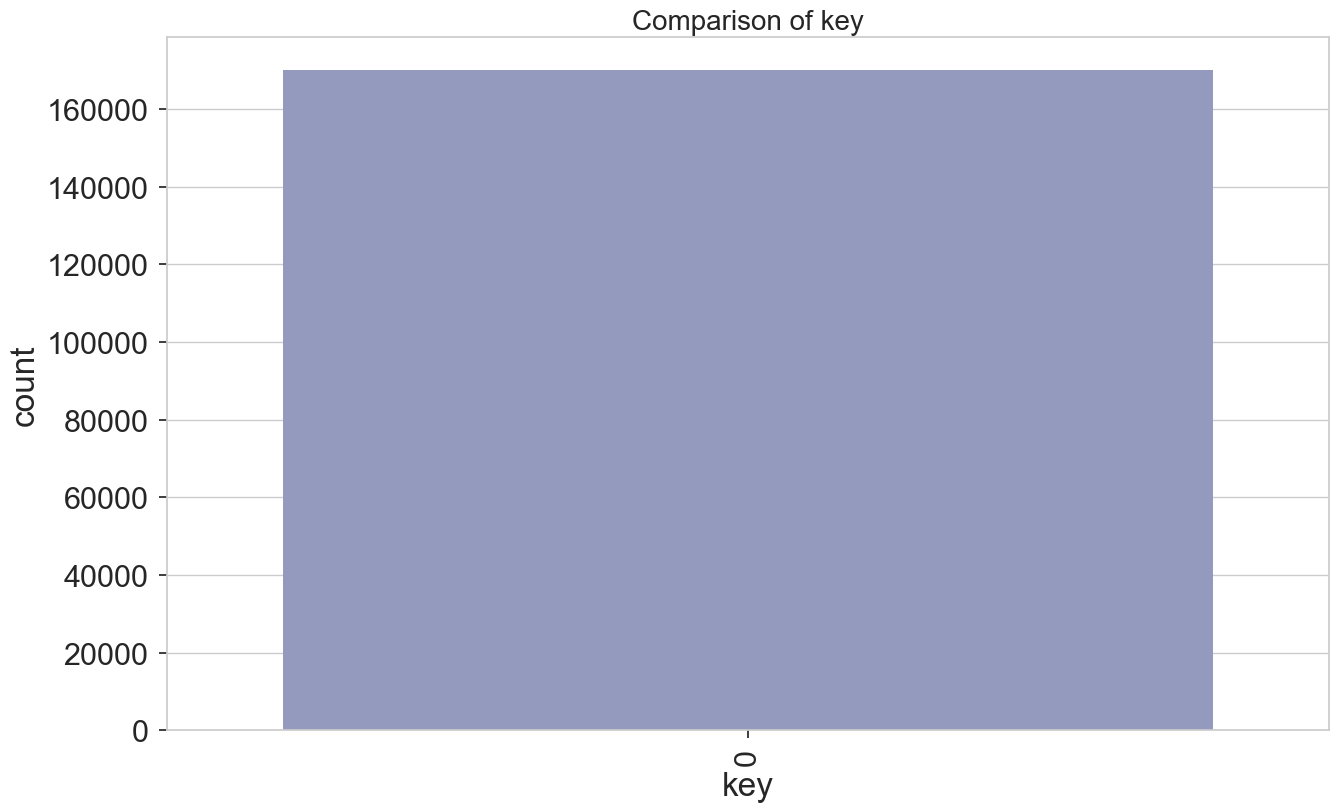

In [19]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['key'], palette = 'BuPu')
plt.title('Comparison of key', fontweight = 30, fontsize = 20)
plt.xlabel('key')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

In [20]:
from yellowbrick.features import JointPlotVisualizer

tempo by artist ... 

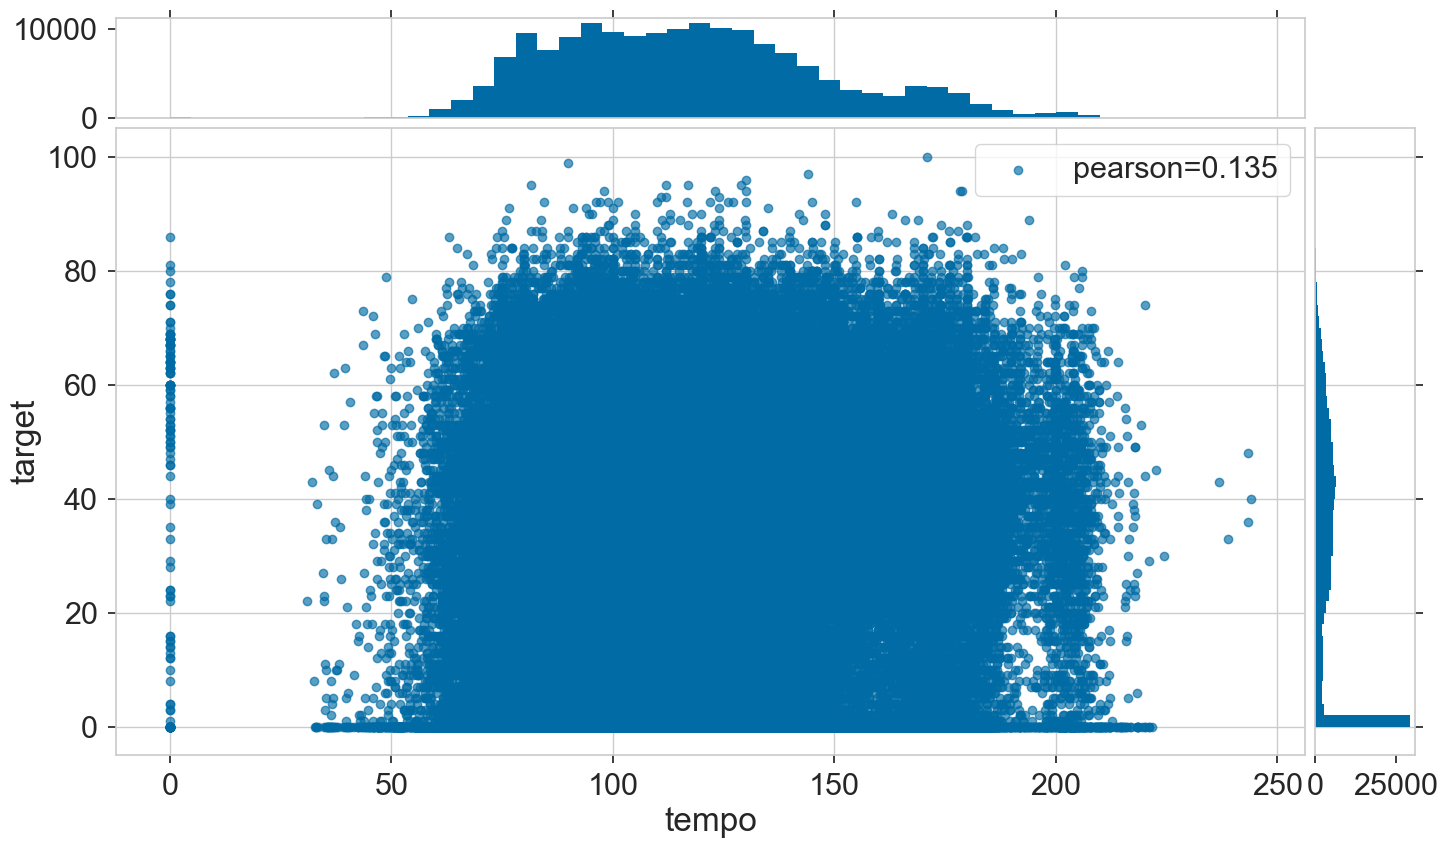

<Axes: xlabel='tempo', ylabel='target'>

In [21]:
# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns="tempo")

plt.rcParams['figure.figsize'] = (12,6)
visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show() 

loudness by artist ... 

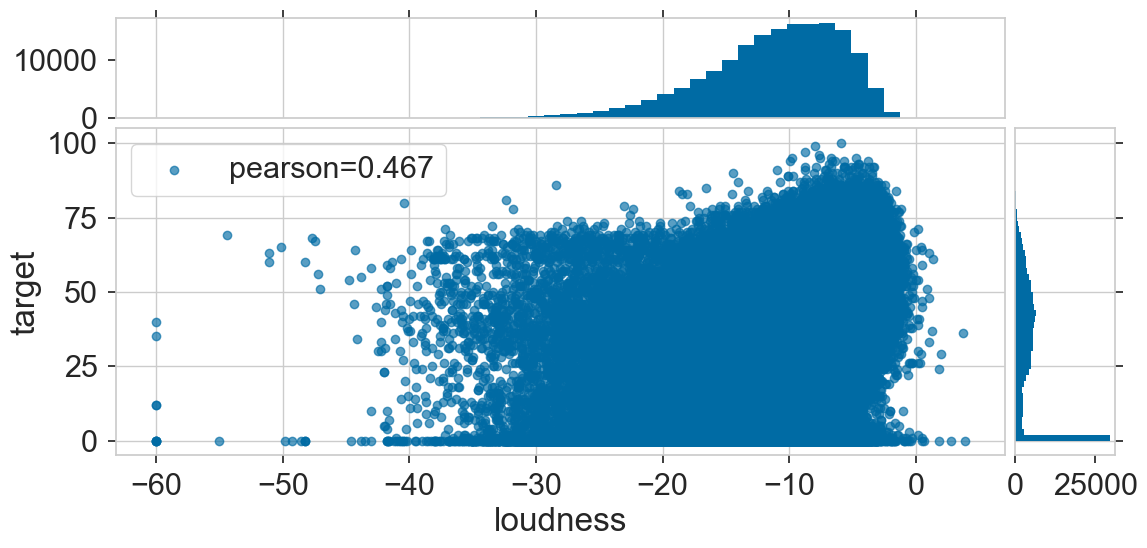

<Axes: xlabel='loudness', ylabel='target'>

In [22]:
# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns="loudness")

plt.rcParams['figure.figsize'] = (12,6)
visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show() 

liveness by artist ... 

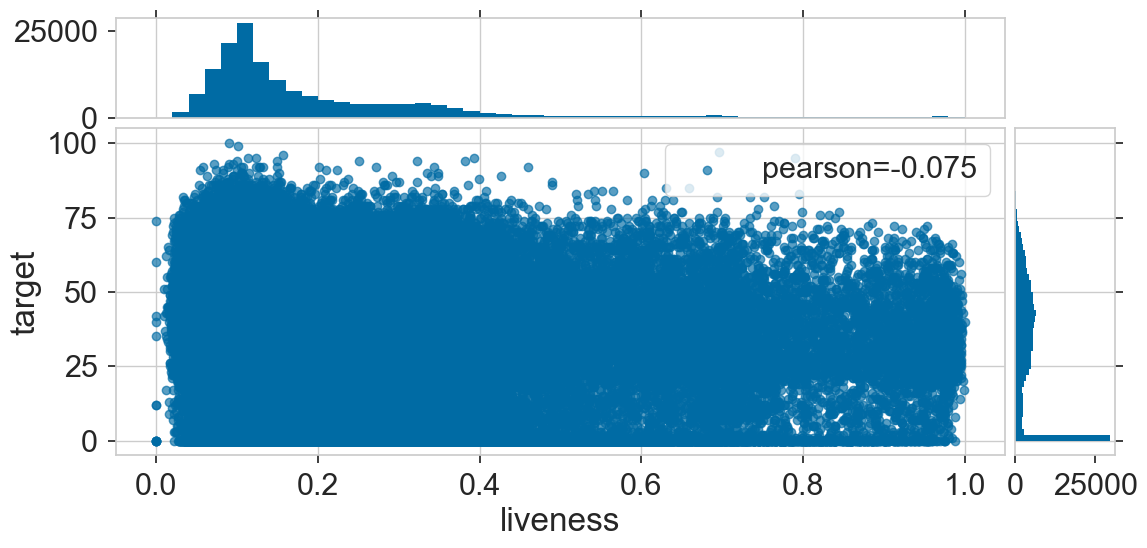

<Axes: xlabel='liveness', ylabel='target'>

In [23]:
visualizer = JointPlotVisualizer(columns="liveness")

plt.rcParams['figure.figsize'] = (12,6)
visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()

lets check with the target ....... "**popularity**"

> * **"popularity VS "loudness" by "years" and with size "key"** 
> * **"popularity VS "liveness" by "years" and with size "key"**

> * **"popularity VS "danceability" by "years" and with size "key"** 
> * **"popularity VS "tempo" by "years" and with size "key"**

# 4 Build Model

In [24]:
use_col = ['acousticness','danceability','loudness','popularity','duration_ms','energy','speechiness','valence']

In [25]:
df_mod = pd.read_csv(r'C:\\Users\\PPL2\\Documents\\Private\\Model\\Pacmann Data Science\\Project\\Project X/data.csv', usecols=use_col,nrows=30000)
df_mod.to_csv('file1.csv') 
df_mod.head()

duration_ms  acousticness  danceability  energy  loudness  speechiness  \
0       220560        0.5250         0.600   0.540   -11.803       0.0328   
1       157840        0.2280         0.368   0.480   -11.605       0.0306   
2       226200        0.0998         0.272   0.684    -9.728       0.0505   
3       157667        0.1850         0.371   0.545    -9.315       0.0307   
4       157667        0.1850         0.371   0.545    -9.315       0.0307   

   valence  popularity  
0    0.547          26  
1    0.338          21  
2    0.279          41  
3    0.310          37  
4    0.310          35

<Axes: >

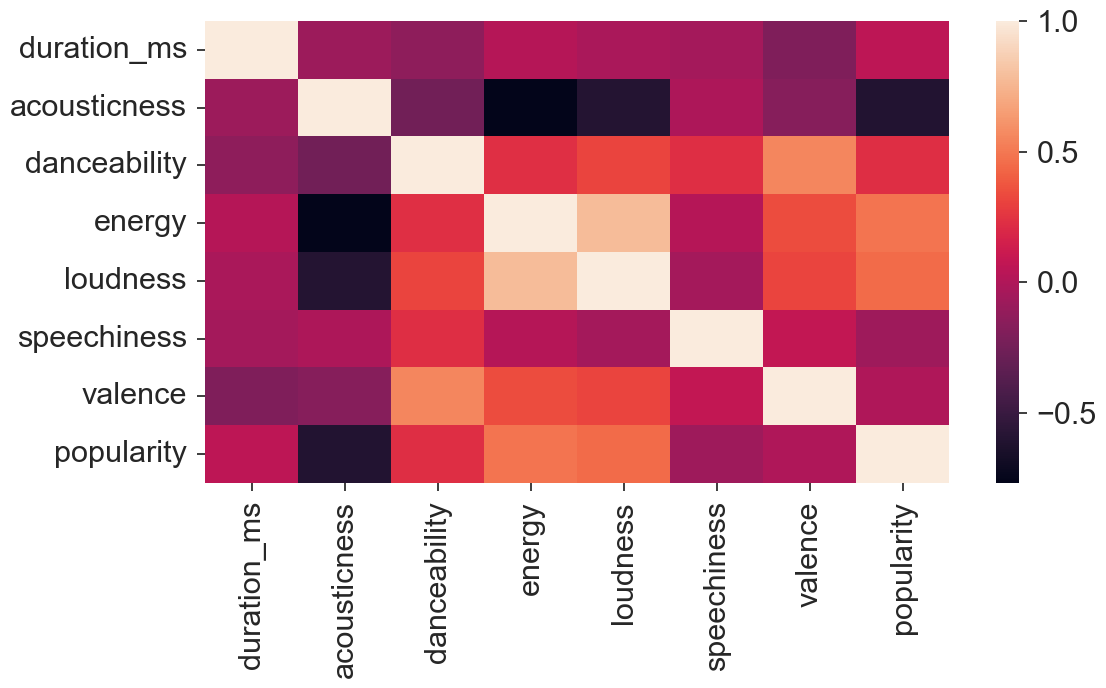

In [26]:
cor = df_mod.corr()
sns.heatmap(cor)

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X = df_mod.drop(columns=['popularity'])
y = df_mod['popularity']

In [28]:
x_train,x_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [29]:
print("num of  train sample in train set:",x_train.shape)
print("Number of samples in validation set:",y_test.shape)

num of  train sample in train set: (24000, 7)
Number of samples in validation set: (6000,)


# 5. Deployment

## "No machine learning model is valuable, untill & unless it’s deployed to production."


In [30]:
#model = RandomForestRegressor()
#n_estim = range(100,1000,100)
#param_grid = {"n_estimators":n_estim}
#model_rf = GridSearchCV(model, param_grid=param_grid,cv=5, scoring='r2',n_jobs=4, verbose=1)

#model_rf.fit(x_train, y_train)
#print(model_rf.best_score_)
#model_rf.best_estimator_

Important features
____________________________________________________________
93.68


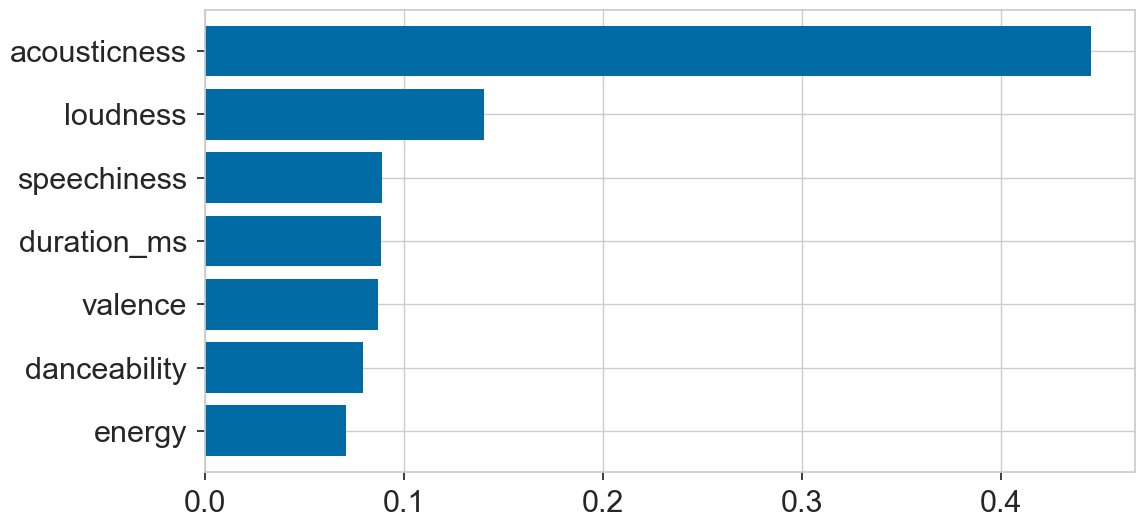

In [31]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

random_forest.fit(x_train, y_train)
Y_pred_rf = random_forest.predict(x_test)
random_forest.score(x_train,y_train)
acc_random_forest = round(random_forest.score(x_train,y_train) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

to deploy as model we need to save the model and use that for making predicts.... so lets save the model using .pkl 

In [32]:
mymodle = open('fordeploy3.pkl', 'wb')

In [33]:
import pickle 

pickle.dump(random_forest,mymodle,protocol=pickle.HIGHEST_PROTOCOL)

In [34]:
mymodle.close()

In [35]:
import numpy as np 
import pickle

mymodel = open('fordeploy3.pkl', 'rb')

model = pickle.load(mymodel)

data = np.array([0.995,0.708,158648,0.1950,	-12.428,0.0506,0.7790])
data = data.reshape(1,-1)

pre = model.predict(data)
print(pre)

[31.98666667]


done ...!! we are actually done with simply model that is "RandomForestRegressor" ... selanjutnya kita membuat ...

### API (application programming interface)

for this we have so many way to do but out of all let me try 

* ## [Streamlit](https://www.streamlit.io/) 
* ## [Flask](https://flask.palletsprojects.com/en/1.1.x/)

to install Streamlit 

> ### pip install Streamlit